In [1]:
from lib.model import model1
from soco.data_center.model import (
  # LinearEnergyConsumptionModel,
  # SimplifiedLinearEnergyConsumptionModel,
  # NonLinearEnergyConsumptionModel,
  # LinearEnergyCostModel,
  # QuotasEnergyCostModel,
  # MinimalDetectableDelayRevenueLossModel,
  SwitchingCost,
  # Location,
  ServerType,
  # Source,
  JobType,
  # DataCenterModel,
)

In [2]:
import logging

FORMAT = '%(levelname)s %(name)s %(asctime)-15s %(filename)s:%(lineno)d %(message)s'
logging.basicConfig(format=FORMAT)
logging.getLogger().setLevel(logging.INFO)

# Modeling

## Switching Cost

In [3]:
switching_cost = SwitchingCost(1, 0.5, 1, 1, 1, 2, 5)

### Normalized Switching Cost

In [4]:
switching_cost.normalized_switching_cost()

18.0

## Model

In [5]:
model = model1(
  1,
  [ServerType("", 1)],
  {"": 100},
  [JobType("", lambda server_type: 1)],
  {"": 1},
  {"": switching_cost},
)

# Inputs

In [6]:
inp = [[1], [5], [10], [3], [1], [100], [10], [3]]
online_inp = [[[[1]]], [[[5]]], [[[10]]], [[[3]]], [[[1]]], [[[100]]], [[[10]]], [[[3]]]]

# Execute

In [8]:
from lib.online import evaluate
from soco.data_center.online import memoryless

evaluate(memoryless, model, [], online_inp)

INFO soco.streaming.online 2021-07-20 18:02:24,984 online.rs:76 Generated a problem instance: Online { p: SimplifiedSmoothedConvexOptimization { d: 1, t_end: 0, bounds: [100.0], switching_cost: [9.0] }, w: 0 }
INFO soco.streaming.online 2021-07-20 18:02:24,986 online.rs:78 Simulating until time slot 0.
INFO soco.streaming.online 2021-07-20 18:02:24,989 online.rs:108 [server] Running on 127.0.0.1:3449.
  0%|          | 0/8 [00:00<?, ?it/s]INFO soco.streaming.online 2021-07-20 18:02:24,994 online.rs:172 [client] Stopping server.
INFO soco.streaming.online 2021-07-20 18:02:24,994 online.rs:115 [server] Connection established!
INFO soco.streaming.online 2021-07-20 18:02:24,996 online.rs:172 [client] Stopping server.
INFO soco.streaming.online 2021-07-20 18:02:24,997 online.rs:136 [server] Server stopped.
INFO soco.streaming.online 2021-07-20 18:02:25,000 online.rs:172 [client] Stopping server.
 38%|███▊      | 3/8 [00:00<00:00, 258.08it/s]


PanicException: called `Result::unwrap()` on an `Err` value: Os { code: 111, kind: ConnectionRefused, message: "Connection refused" }

In [7]:
from lib.offline import evaluate_1d

fractional_cost, integral_cost = evaluate_1d(model, inp)

In [8]:
fractional_cost, integral_cost

(1341.4675195106784, inf)

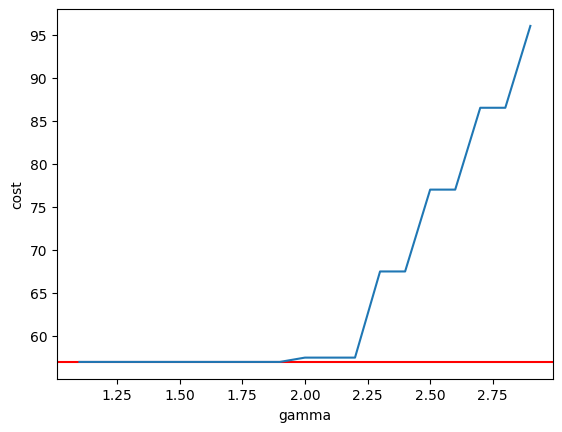

In [7]:
from lib.utils import plot
import numpy as np
import matplotlib.pyplot as plt
from lib.offline import evaluate_approx_graph_search

# plot(np.array([1,2,3,4,5]), np.array([1,2,3,4,5]), 'x axis', 'y axis', 'test')
# plt.show()

x, y, opt = evaluate_approx_graph_search(model, inp)
plt.axhline(y=opt, color='r', linestyle='-')
plot(x, y, 'gamma', 'cost', 'approx_graph_search')
plt.show()